In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df= pd.read_csv('/kaggle/input/wine-data/wine_data.csv', header= None, usecols= [0, 1, 2])

In [46]:
df.columns= ['Class Label', 'Alcohol', 'Malic Acid']

In [47]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

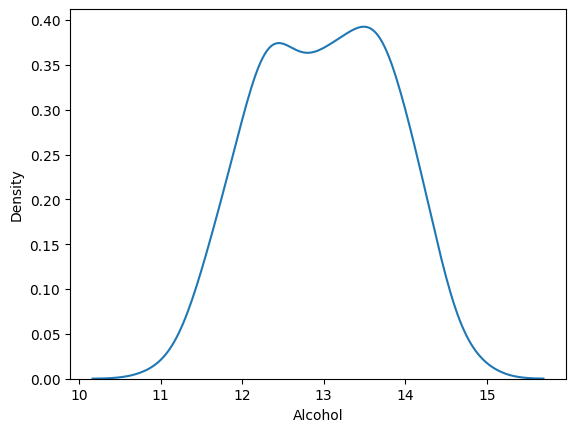

In [48]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

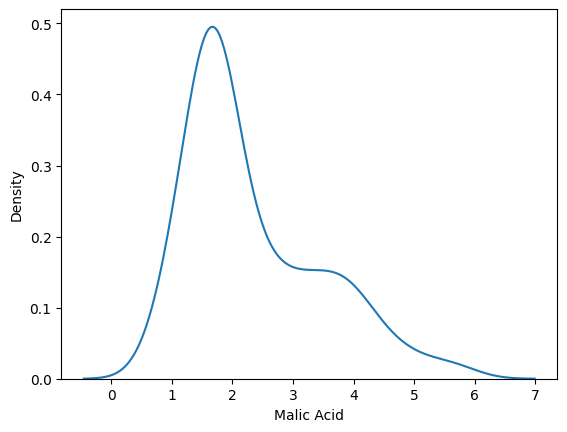

In [49]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

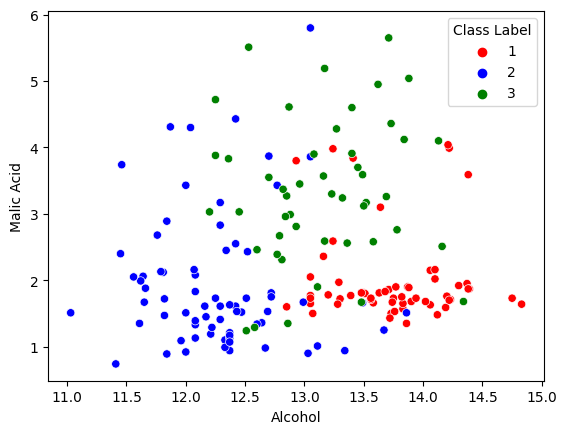

In [50]:
color_dict= {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(data= df, x= 'Alcohol', y= 'Malic Acid', hue= 'Class Label', palette= color_dict)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class Label', axis= 1), df['Class Label'], test_size= 0.2, random_state= 0)

In [52]:
X_train.shape, X_test.shape

((142, 2), (36, 2))

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [55]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [56]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [57]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: xlabel='Alcohol', ylabel='Density'>

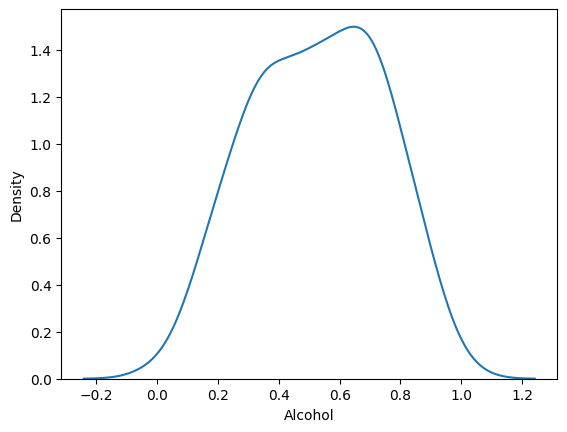

In [66]:
sns.kdeplot(X_train_scaled['Alcohol'])

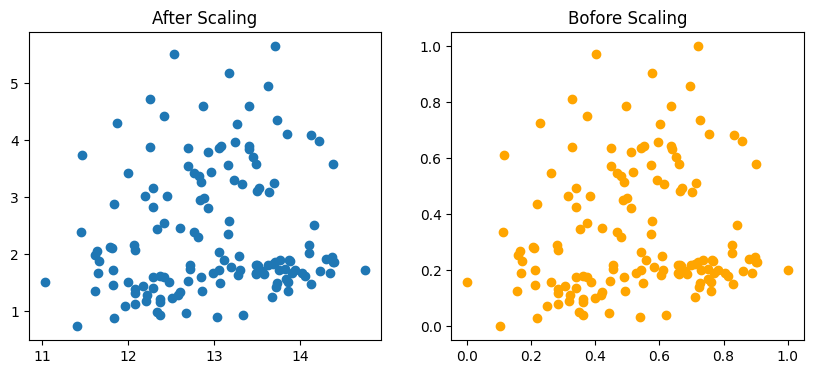

In [73]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('After Scaling')
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'])
ax2.set_title('Bofore Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], color= 'orange')
plt.show()

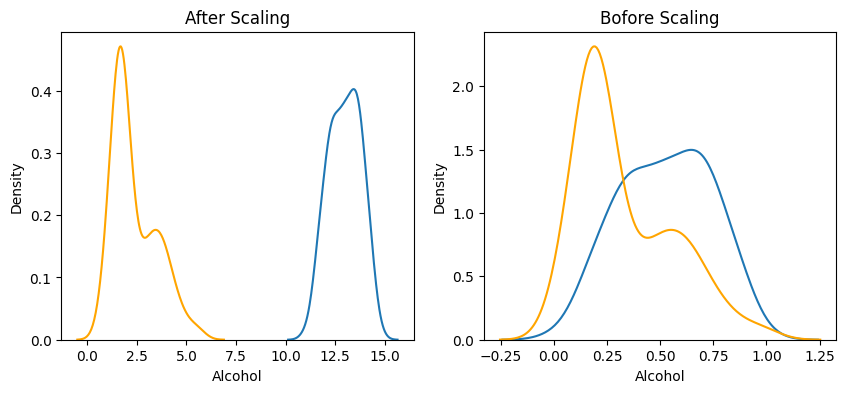

In [79]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

sns.kdeplot(X_train['Alcohol'], ax= ax1)
sns.kdeplot(X_train['Malic Acid'], ax= ax1, color= 'orange')
ax1.set_title('After Scaling')


sns.kdeplot(X_train_scaled['Alcohol'], ax= ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax= ax2, color='orange')
ax2.set_title('Bofore Scaling')
plt.show()

<Axes: xlabel='Alcohol', ylabel='Density'>

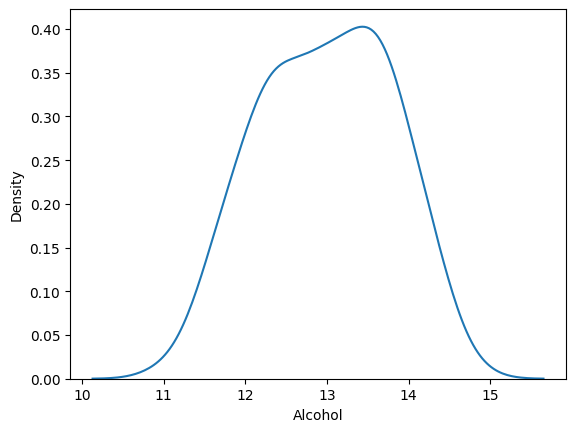

In [80]:
sns.kdeplot(X_train['Alcohol'])

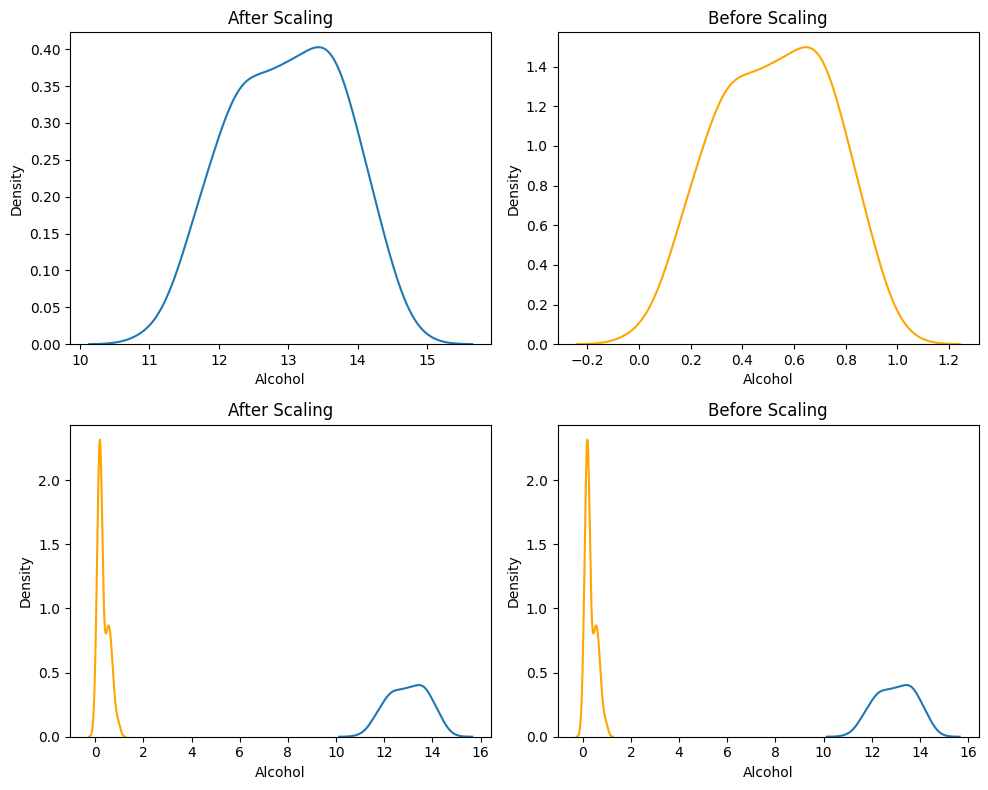

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]

sns.kdeplot(X_train['Alcohol'], ax=ax1)
ax1.set_title('After Scaling')

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, color='orange')
ax2.set_title('Before Scaling')

sns.kdeplot(X_train['Alcohol'], ax=ax3)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax3, color='orange')
ax3.set_title('After Scaling')

sns.kdeplot(X_train['Alcohol'], ax=ax4)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax4, color='orange')
ax4.set_title('Before Scaling')

plt.tight_layout()
plt.show()